# Generate test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Raw data (values)

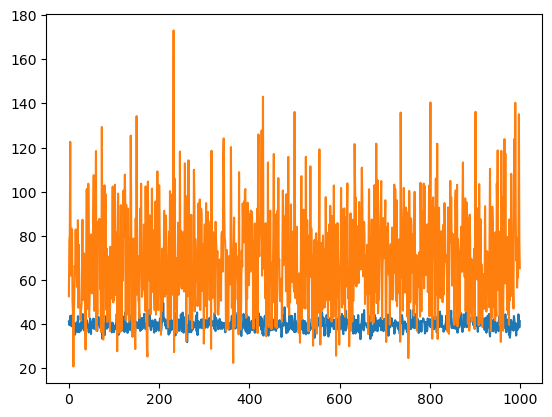

In [2]:
# generate data
np.random.seed(42)
n = np.random.normal(40, 2.5, 1000)
np.random.seed(2409)
g = np.random.gamma(10, 7, 1000)

# save data
#np.savetxt("g/test_data_g.csv", g, delimiter=",")
#np.savetxt("n/test_data_n.csv", n, delimiter=",")

# plot
plt.plot(n)
plt.plot(g)
plt.show()

### Discretized data (different bins for n & g)

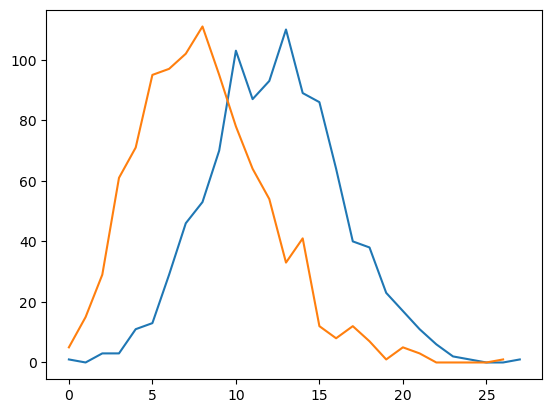

In [3]:
# binning method
bins = 'fd'

# get the bins
bins_n = np.histogram_bin_edges(n, bins)
bins_g = np.histogram_bin_edges(g, bins)

# calculate the empirical probabilities
count_n = np.histogram(n, bins=bins)[0]
count_g = np.histogram(g, bins=bins)[0]

# save histcounts
np.savetxt("n/test_data_n_histcounts_fd.csv", count_n, delimiter=",")
np.savetxt("g/test_data_g_histcounts_fd.csv", count_g, delimiter=",")

# plot
plt.plot(count_n)
plt.plot(count_g)
plt.show()

### Joint probabilites (same binning for n & g)

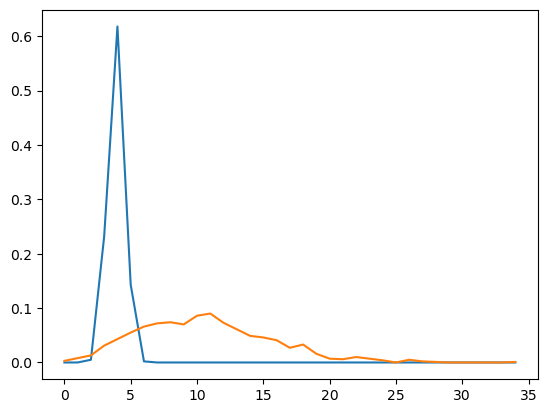

In [6]:
# binning method
bins = 'fd'

# get the joint bins
bins_ng = np.histogram_bin_edges([n, g], bins)

# calculate unconditioned histograms
hist_n = np.histogram(n, bins=bins_ng)[0]
hist_g = np.histogram(g, bins=bins_ng)[0]

# calculate the probabilities
p_ng = (hist_n / np.sum(hist_n)) + 1e-15
p_gn = (hist_g / np.sum(hist_g)) + 1e-15

# save
np.savetxt("n/test_data_n_pdf_same_bins_fd.csv", p_ng, delimiter=",")
np.savetxt("g/test_data_g_pdf_same_bins_fd.csv", p_gn, delimiter=",")

# plot
plt.plot(p_ng)
plt.plot(p_gn)
plt.show()

### 2D Histogram counts

In [5]:
# get the bins, n and g get their own bins
bins_joint = [bins_n, bins_g]

# get the joint histogram
joint_counts = np.histogram2d(n, g, bins_joint)[0]

# save
np.savetxt("test_data_n_g_joint_counts_fd.csv", joint_counts, delimiter=",")